In [ ]:
import pandas as pd
import numpy as np
import os, chardet, glob
import matplotlib.pyplot as plt
import seaborn



from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras import Sequential, optimizers, losses, layers


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# dataset is taken from Kaggle https://www.kaggle.com/datasets/atechnohazard/battery-and-heating-data-in-real-driving-cycles

# Getting the list of all files and directories
path = "/content/drive/MyDrive/RedBrickHacks/dataSet"
dir_list = os.listdir(path)

# print("Files and directories in '", path, "' :")

df_master = pd.DataFrame()  # Initialize an empty dataframe to hold combined data

# Loop through all CSV files in the specified directory
for filename in dir_list:
    # Read CSV using detected encoding
    detected_encoding = chardet.detect(open("/content/drive/MyDrive/RedBrickHacks/dataSet/"+filename, 'rb').read())['encoding']
    df_trip = pd.read_csv("/content/drive/MyDrive/RedBrickHacks/dataSet/"+filename, sep=';', encoding=detected_encoding)

    # Concatenate data to the master dataframe
    df_master = pd.concat([df_master, df_trip], ignore_index=True)
    # print(df_master)  # Print master dataframe after each iteration

    # Save the combined dataframe to a new CSV file
df_master = df_master.drop_duplicates()
df_master.to_csv('/content/drive/MyDrive/RedBrickHacks/dataSet/AllTrips.csv', index=False)

print(dir_list)


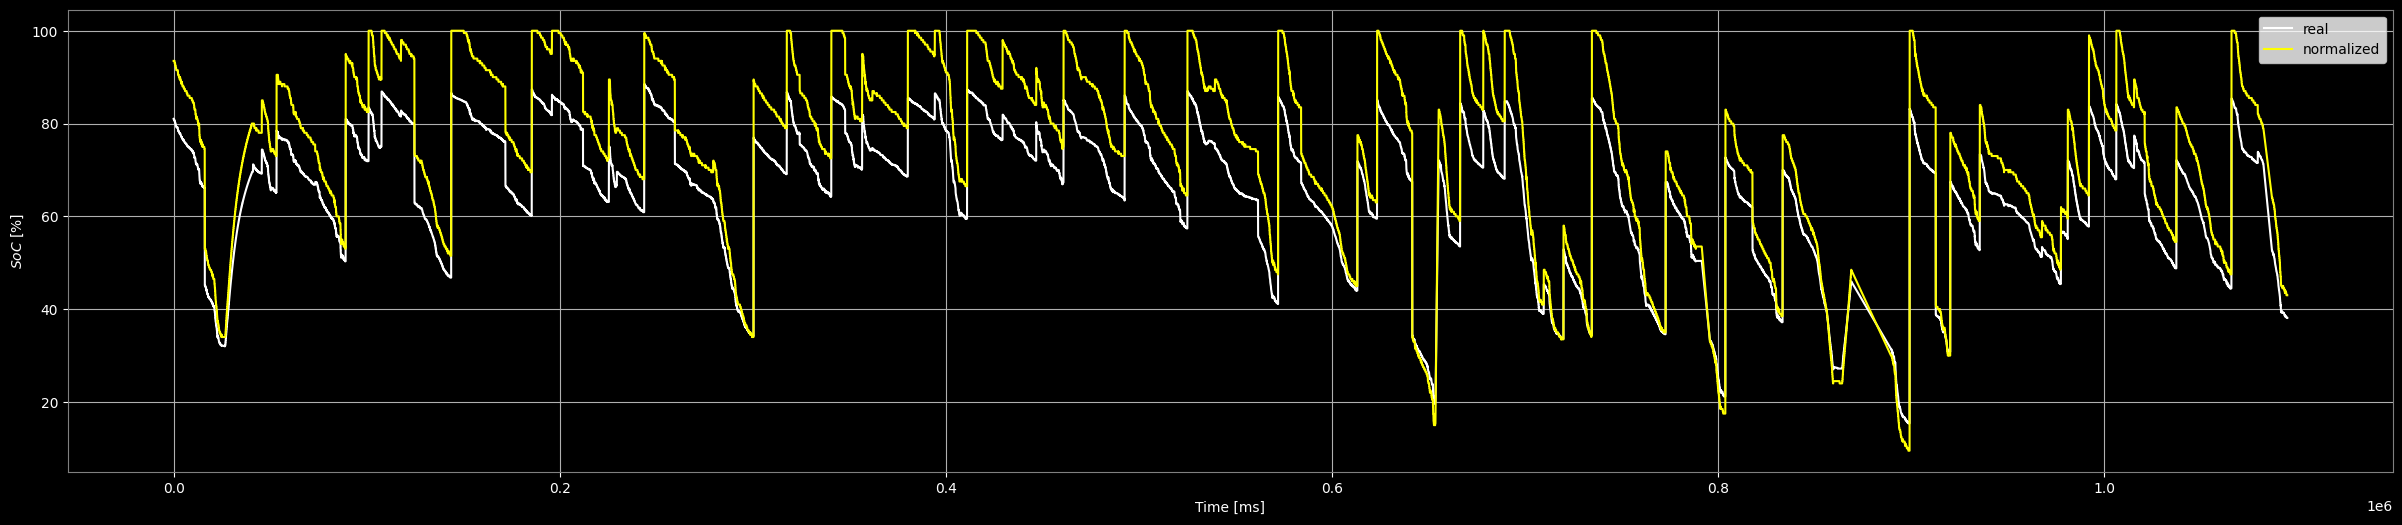

In [ ]:
dataSet = pd.read_csv("/content/drive/MyDrive/RedBrickHacks/dataSet/AllTrips.csv")

df_soc = dataSet[['SoC [%]', 'displayed SoC [%]']].dropna()

plt.figure(figsize=(30, 6), facecolor='black')
ax = plt.axes()
ax.set_facecolor("black")
ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.tick_params(colors='white', which='both')
plt.grid(True)


plt.plot(df_soc['SoC [%]'], color="white")
plt.plot(df_soc['displayed SoC [%]'], color="yellow")


plt.xlabel('Time [ms]', color='white')
plt.ylabel('$SoC$ [%]', color='white')

plt.legend(['real','normalized'])



<Axes: >

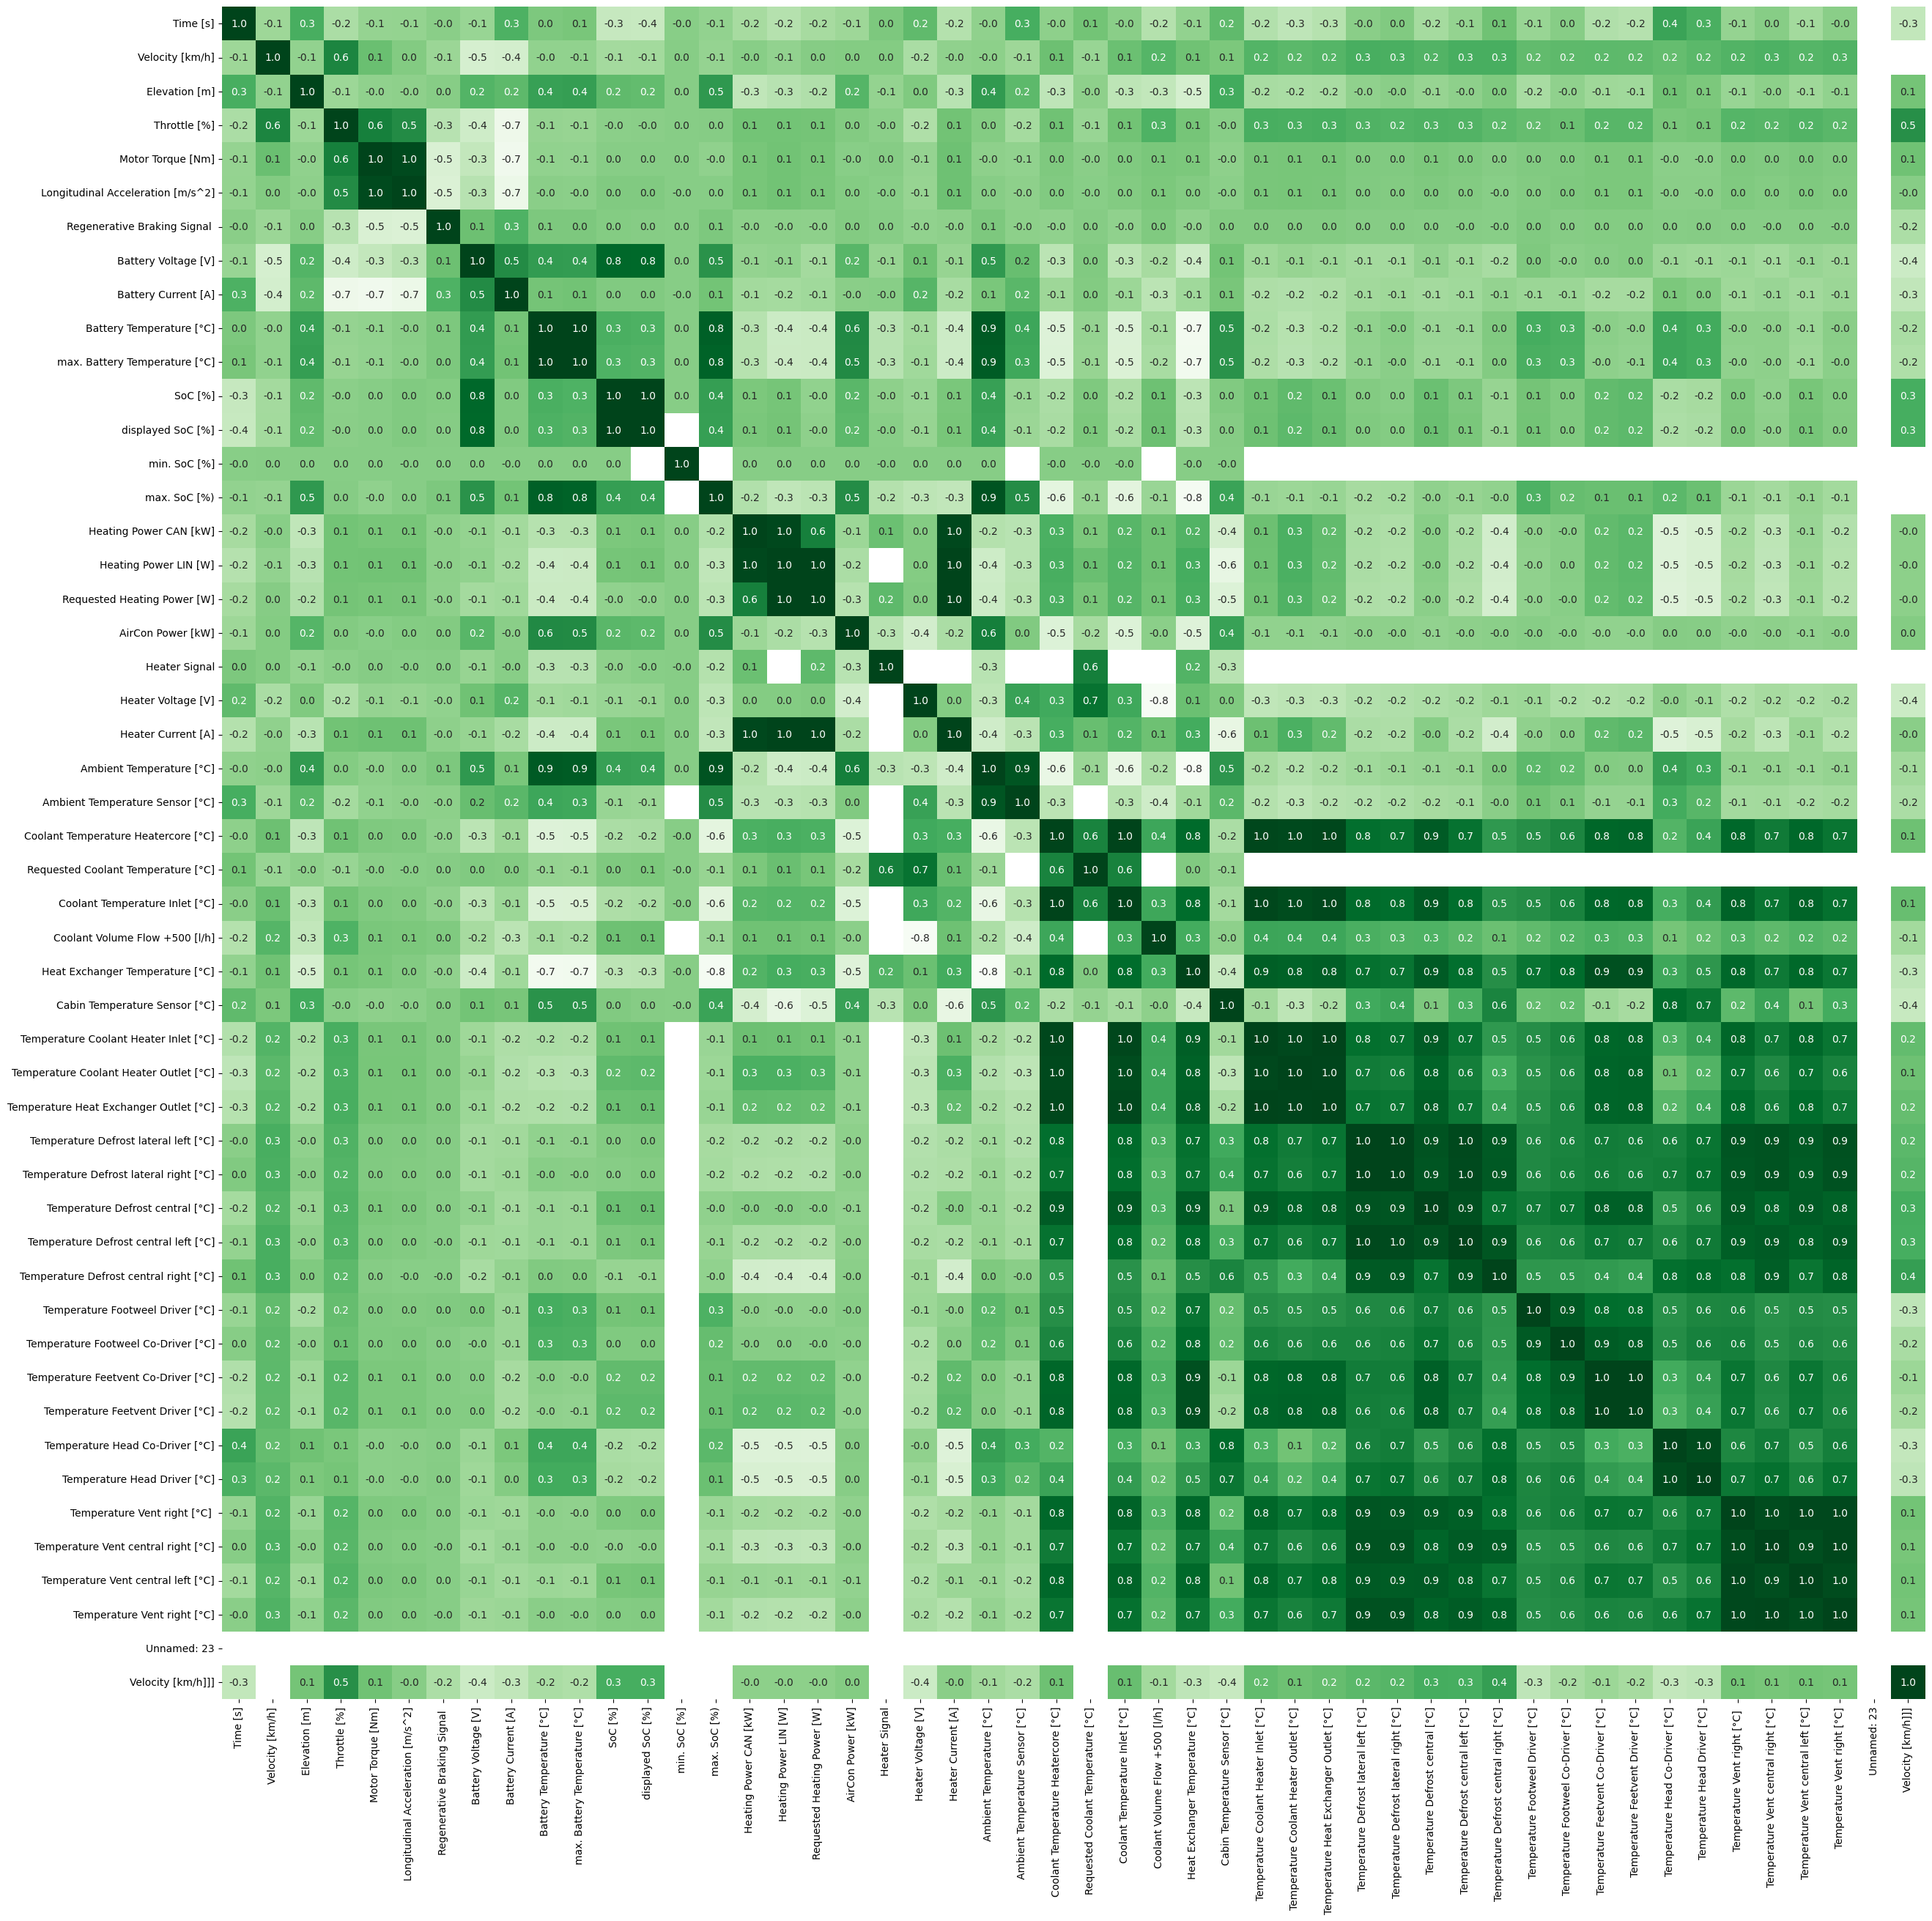

In [ ]:
plt.figure(figsize=(30, 30))
seaborn.heatmap(dataSet.corr(),annot=True, cbar=False, cmap='Greens', fmt='.1f')

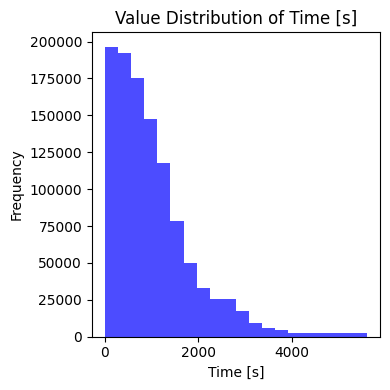

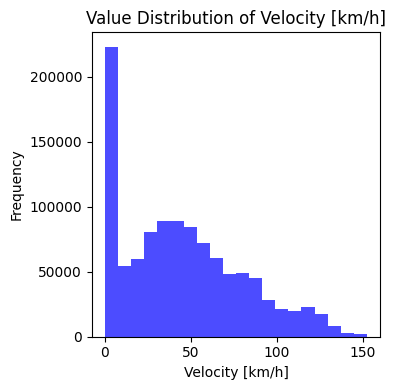

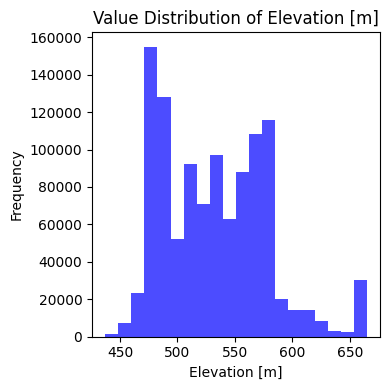

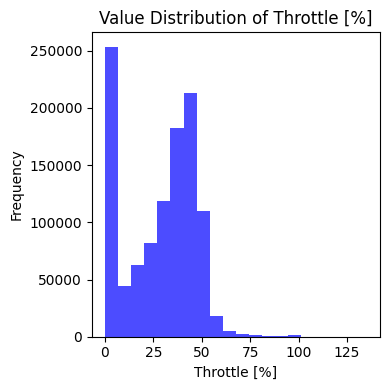

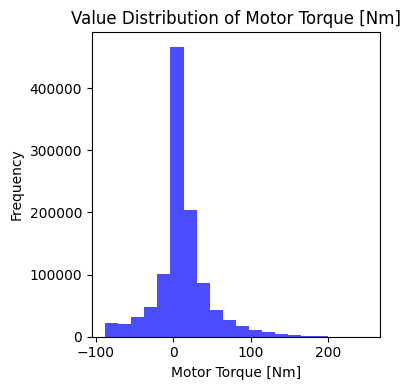

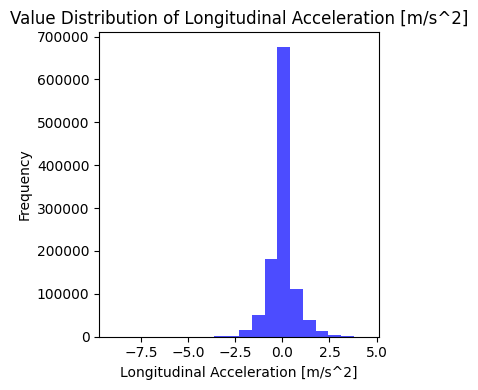

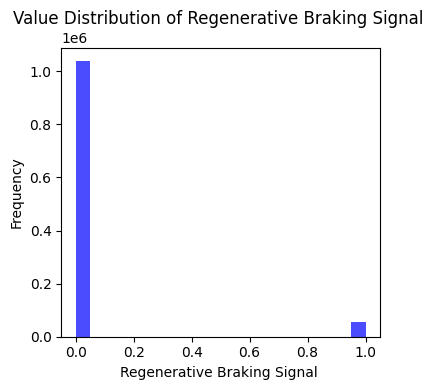

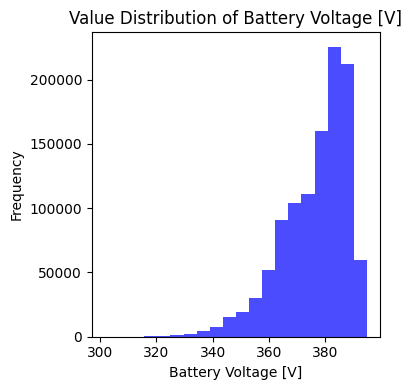

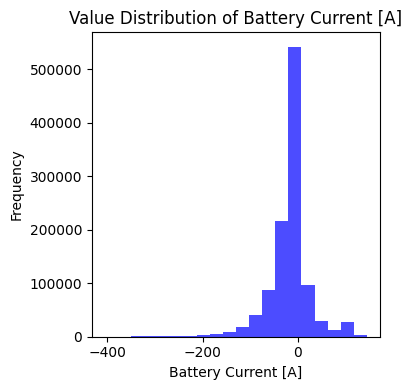

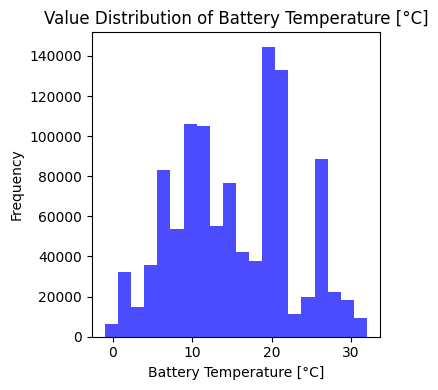

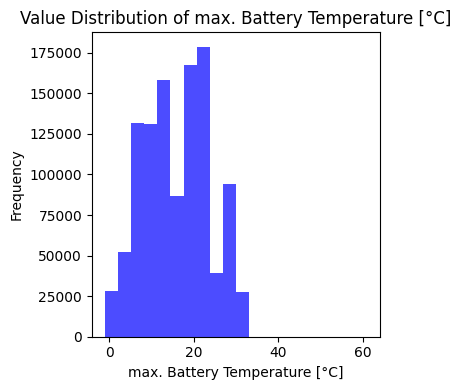

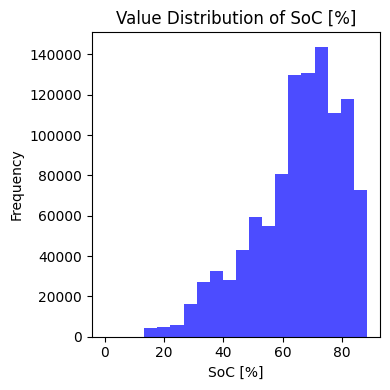

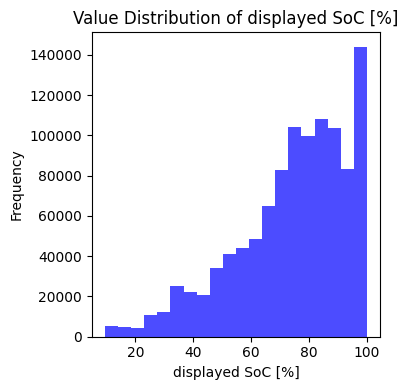

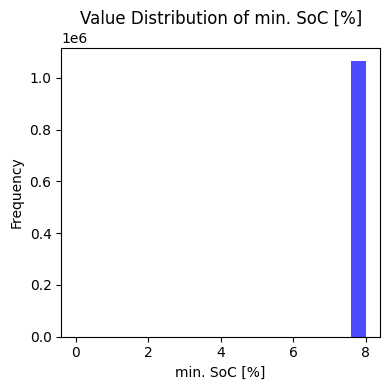

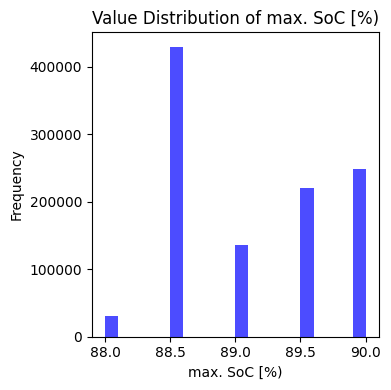

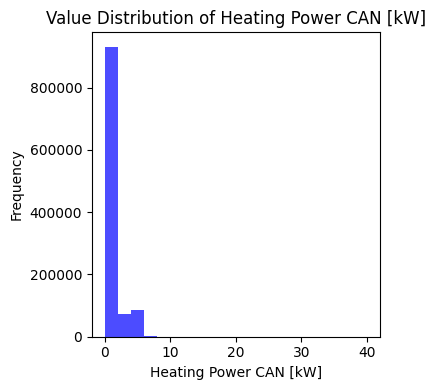

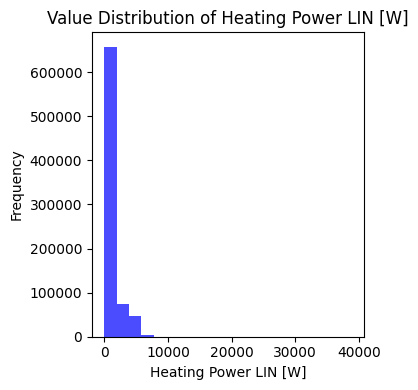

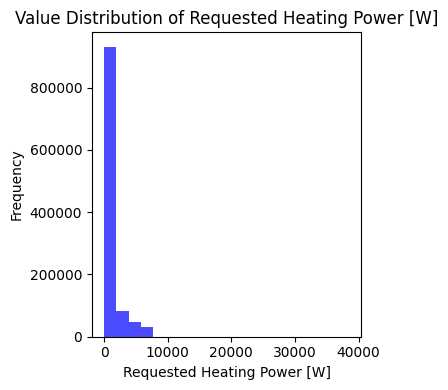

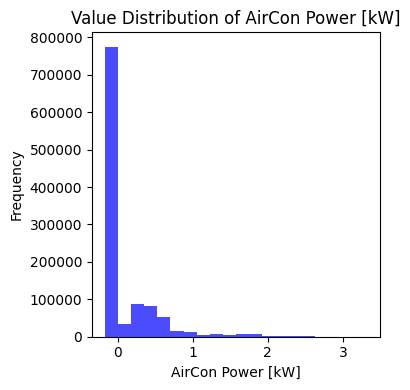

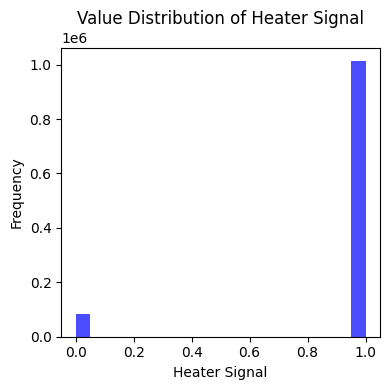

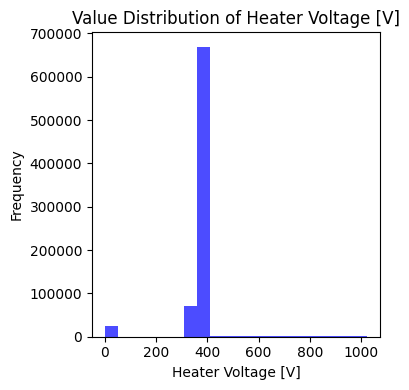

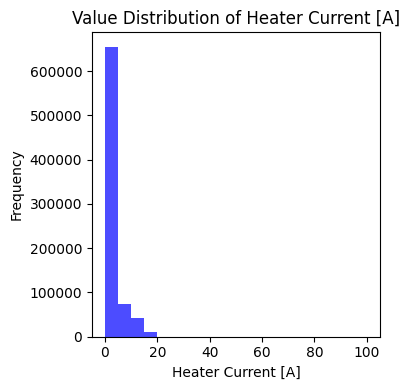

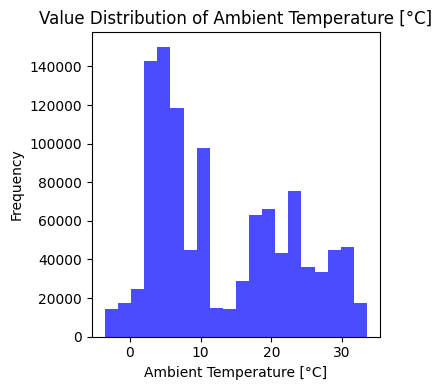

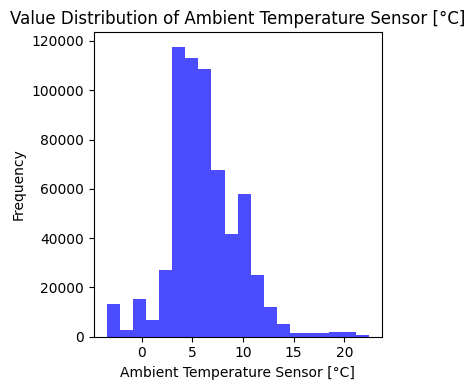

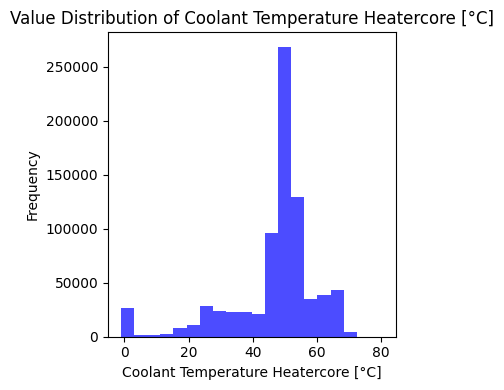

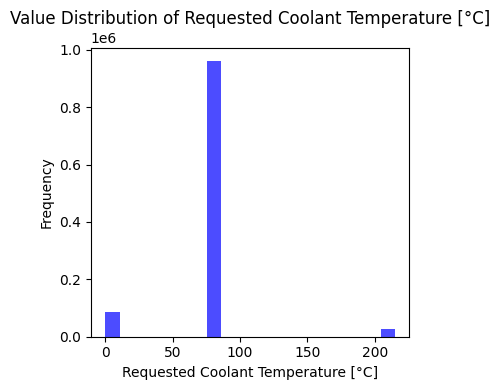

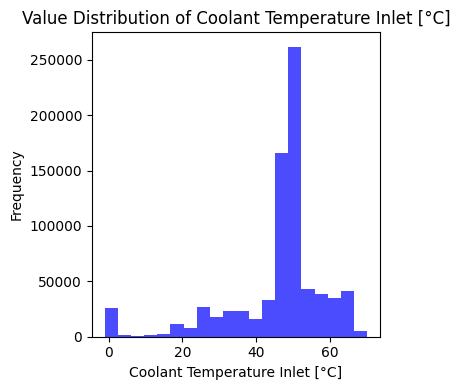

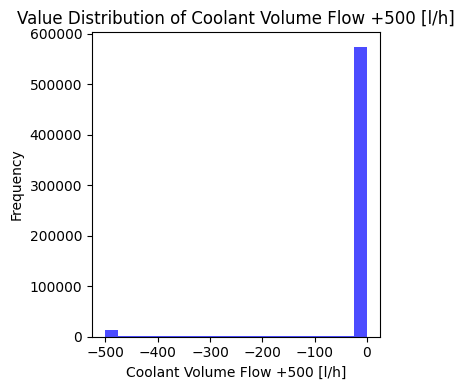

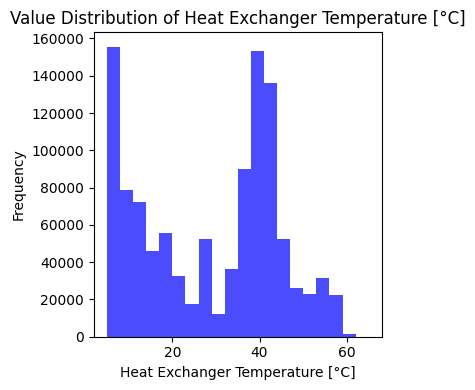

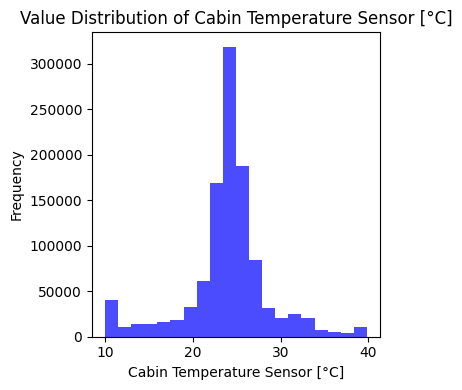

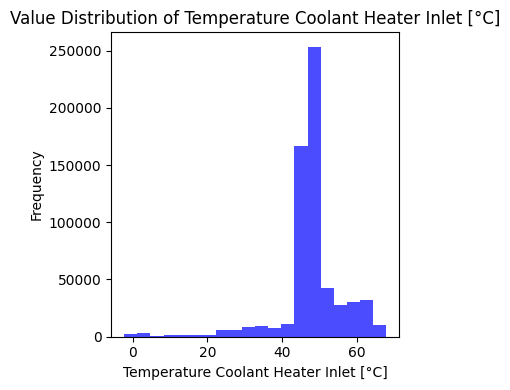

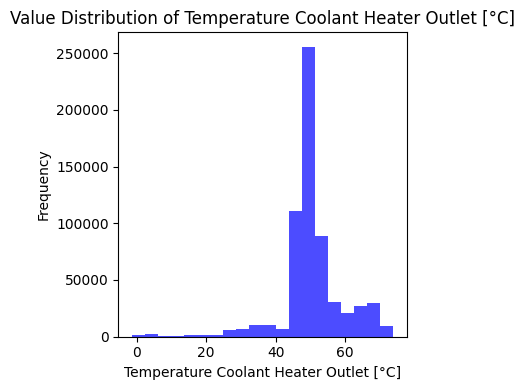

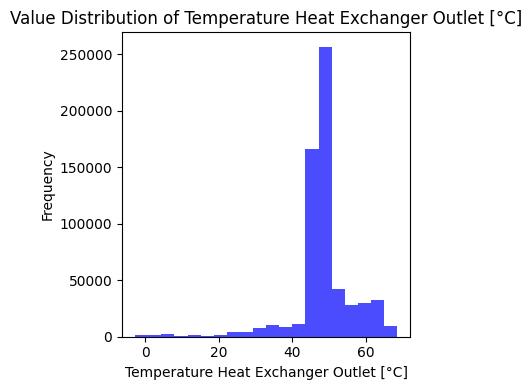

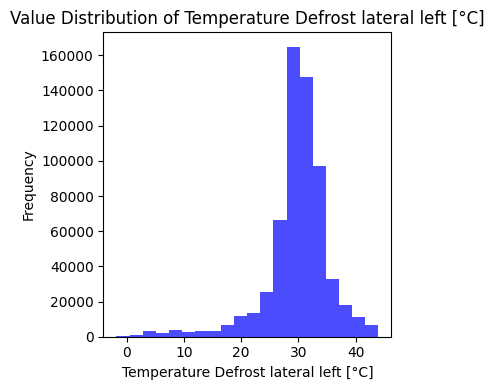

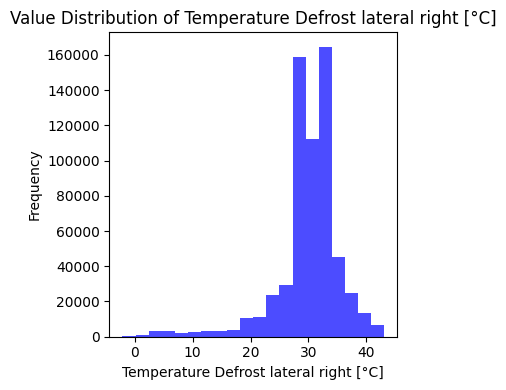

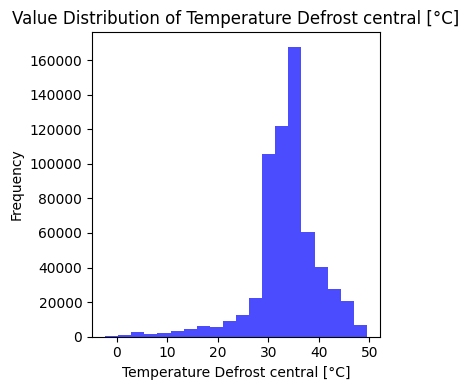

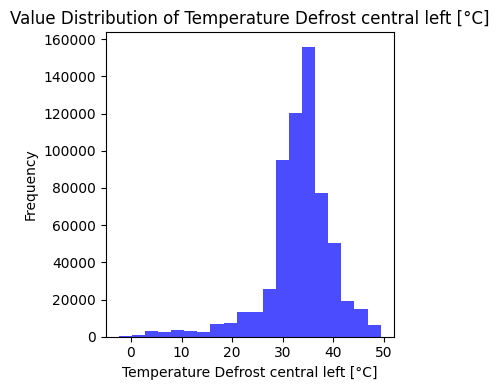

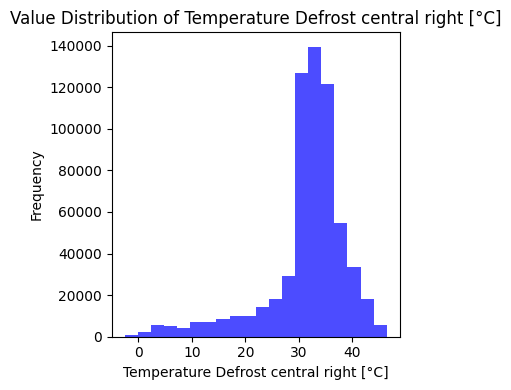

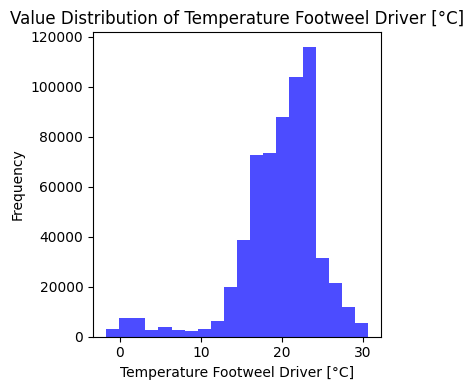

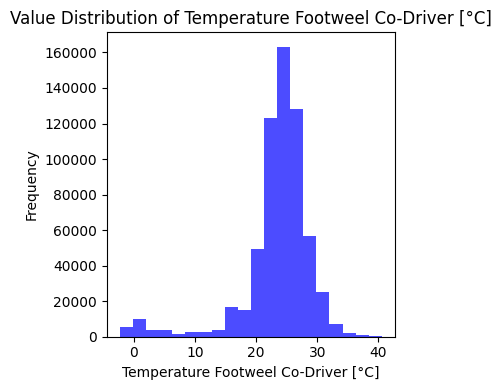

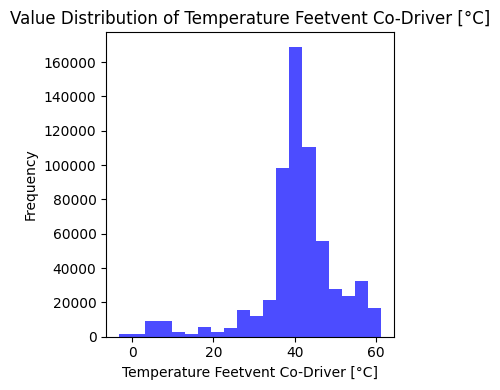

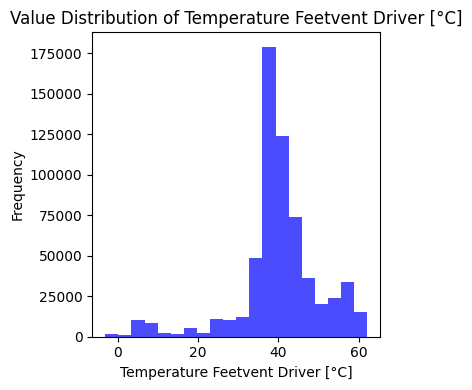

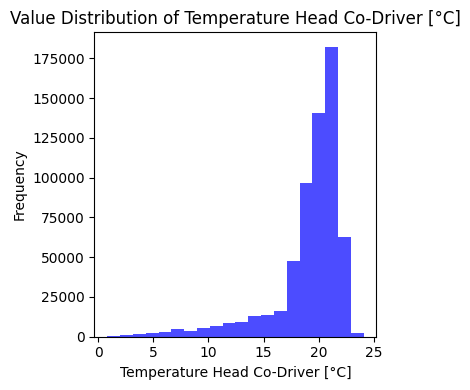

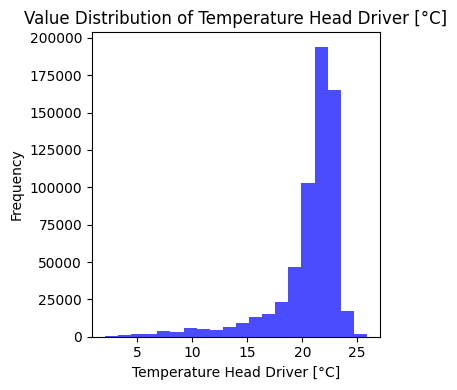

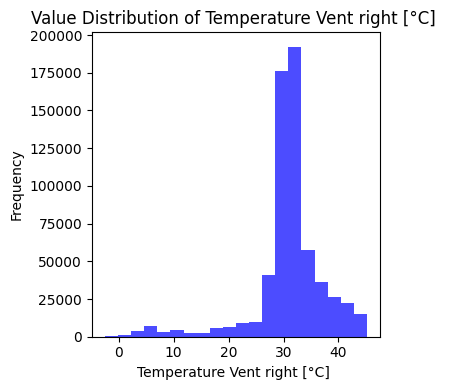

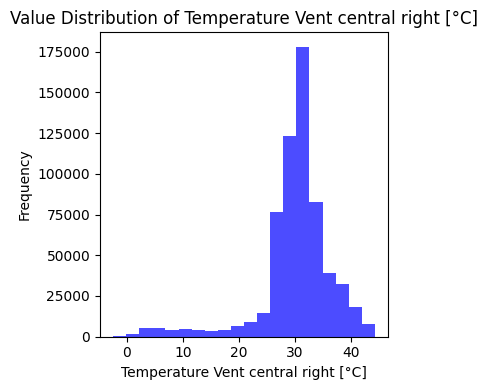

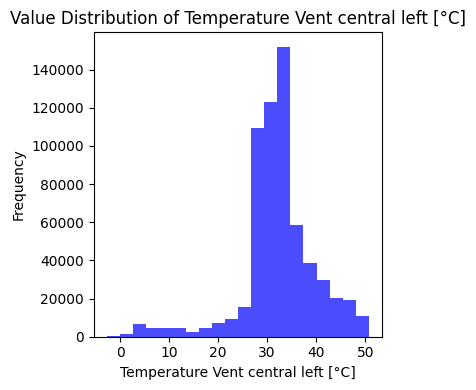

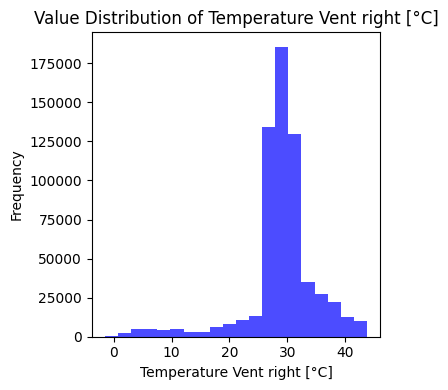

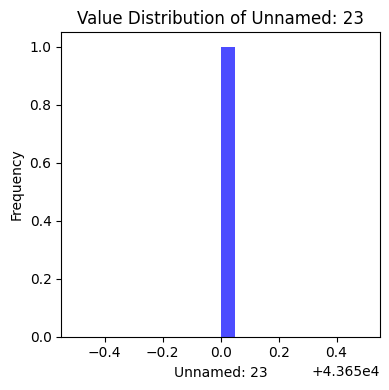

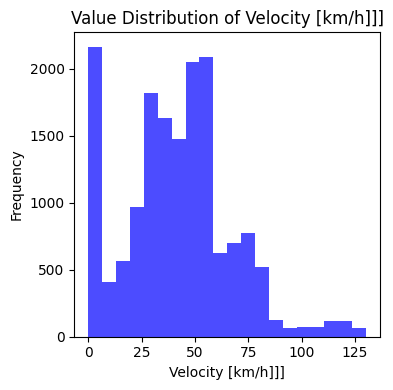

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/RedBrickHacks/dataSet/AllTrips.csv")

# Loop through each feature and create histograms
for column in df.columns:
    plt.figure(figsize=(4, 4))
    plt.hist(df[column], bins=20, color='blue', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Value Distribution of {column}')
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = df.drop(["Unnamed: 23", "Coolant Volume Flow +500 [l/h]", "Requested Coolant Temperature [°C]", "Heater Signal", "Heater Voltage [V]"], axis=1)

scaler = MinMaxScaler()

# Fitting and transforming the dataframe to normalize the values
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Saving the normalized dataframe to a CSV file
df_normalized.to_csv('/content/drive/MyDrive/RedBrickHacks/dataSet/normalized_dataset.csv', index=False)

In [ ]:
#@title handeling null values
from sklearn.impute import SimpleImputer
data = pd.read_csv('/content/drive/MyDrive/RedBrickHacks/dataSet/normalized_dataset.csv')
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [ ]:
#@title data after handeling Nan Values

df_imputed.to_csv("/content/drive/MyDrive/RedBrickHacks/dataSet/processedData.csv")
df_imputed
has_nan = df_imputed.isna().any().any()

if has_nan:
    print("The dataset contains NaN values.")
else:
    print("The dataset does not contain NaN values.")

The dataset does not contain NaN values.


In [ ]:
#@title ML models

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

data = pd.read_csv('/content/drive/MyDrive/RedBrickHacks/dataSet/processedData.csv')

X = data.drop(columns=['SoC [%]'])

Y = data[['SoC [%]']]

# Y

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initializing the regression model
LR = LinearRegression()

# Training the model on the training data
LR.fit(X_train, y_train)

model_filename = '/content/drive/MyDrive/RedBrickHacks/dataSet/linearRegression.joblib'
joblib.dump(LR, model_filename)

# Making predictions on the test data
predictions = LR.predict(X_test)

# Calculating RMSE (Root Mean Squared Error) value for evaluation of the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse:.2f}')


Root Mean Squared Error: 0.01


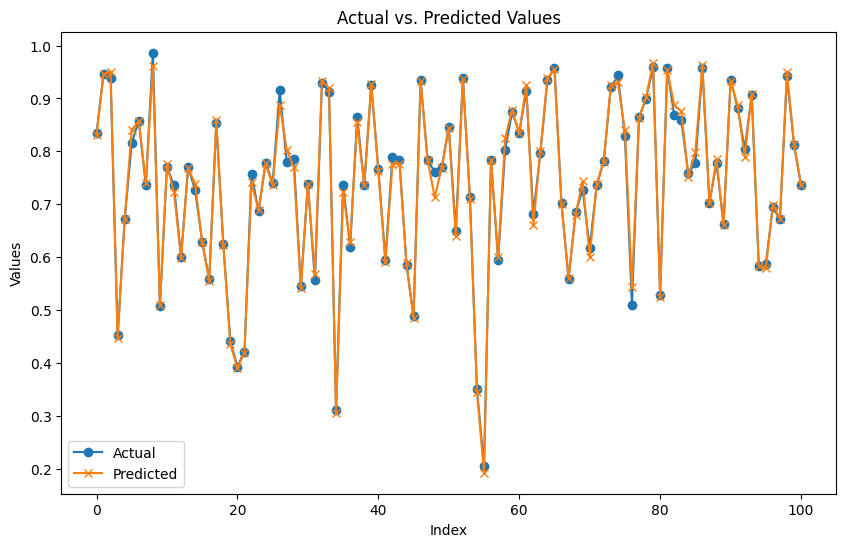

In [ ]:
y_test = y_test[:101]
predictions = predictions[:101]
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', marker='o')
plt.plot(range(len(predictions)), predictions, label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [1]:
#@title Random Forest Regressor

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

data = pd.read_csv('/content/drive/MyDrive/RedBrickHacks/dataSet/processedData.csv')

X = data.drop(columns=['SoC [%]'])

Y = data[['SoC [%]']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=42)

# Initializing the Random Forest Regressor
RF = RandomForestRegressor(n_estimators=100, random_state=42)

y_train = y_train.values.ravel()
# Now Training the model on the training data
RF.fit(X_train, y_train)

joblib.dump(RF, "/content/drive/MyDrive/RedBrickHacks/dataSet/randomForest.joblib")

# Predicting on the test data
predictions = RF.predict(X_test)

# For performance measure calculating RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse:.2f}')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/RedBrickHacks/dataSet/processedData.csv'

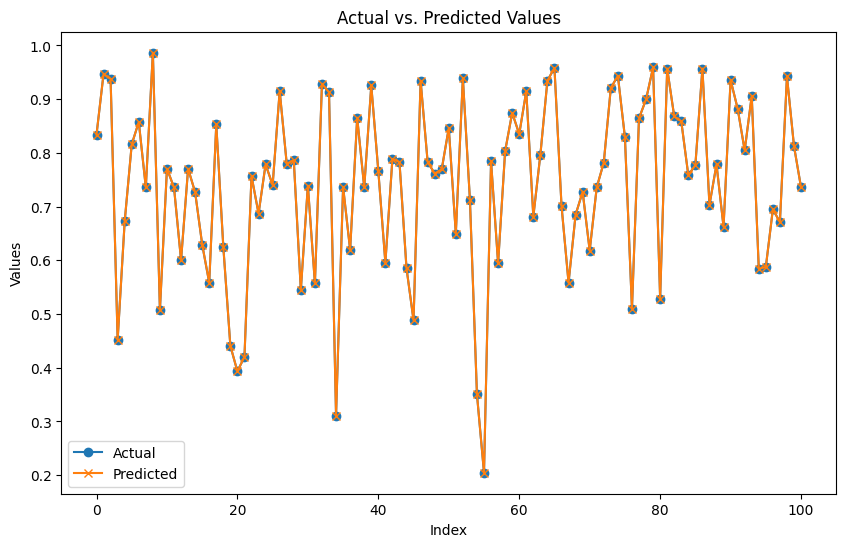

In [ ]:
#@title Actual vs Predicted

import matplotlib.pyplot as plt

y_test = y_test[:101]
predictions = predictions[:101]
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', marker='o')
plt.plot(range(len(predictions)), predictions, label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()